In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 数据读取

数据第一列是房屋大小，第二列是卧室数量，第三列是房屋售价。根据数据建立模型，预测房屋售价。

In [6]:
data = pd.read_csv('ex1data2.txt', names = ['size', 'bedrooms', 'price'])
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 均值归一化

In [4]:
def featureScale(data):
    return (data-data.mean()) / data.std()

In [7]:
dataS = featureScale(data)
dataS.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## Data Plotting

#### 房间大小(size)与售价的数据散点图

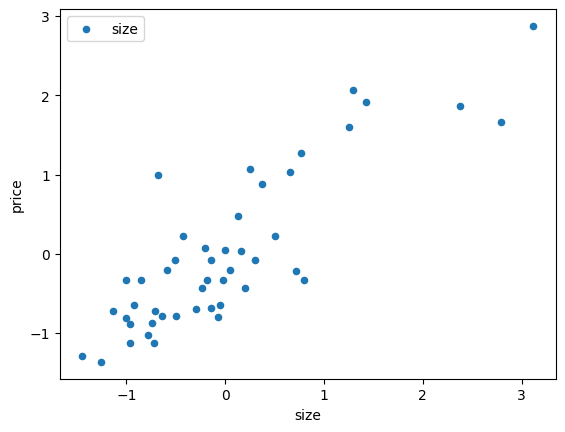

In [10]:
dataS.plot.scatter('size', 'price', label = 'size')
plt.show()

#### 卧室数量(bedrooms)与售价的数据散点图

<function matplotlib.pyplot.show(close=None, block=None)>

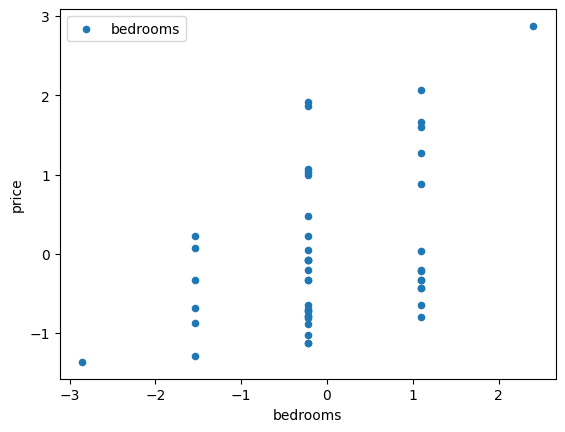

In [11]:
dataS.plot.scatter('bedrooms', 'price', label = 'bedrooms')
plt.show

## 数据处理

In [12]:
# 加一列常数项
dataS.insert(0, 'x_0', 1)

In [99]:
# 初始化x
x = dataS.iloc[:, 0:-1]
x.head()

,x_0,size,bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [100]:
x = np.matrix(x.values)
x.shape

(47, 3)

In [21]:
# 初始化y
y = dataS.iloc[:, -1]
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: price, dtype: float64

In [22]:
y = np.matrix(y.values).T
y.shape

(47, 1)

In [24]:
# 初始化theta
theta = np.zeros((3,1))

## Cost Function

In [72]:
def costFunc(x,y,theta):
    inner = np.power((x @ theta - y), 2)
    return np.sum(inner) / (2*len(x))

In [74]:
cf = costFunc(x, y, theta)
print(cf)

0.4893617021276595


## Gradient Descent

In [76]:
def gradientDescent(x, y, theta, alpha, iters):
    cost = []
    for i in range(iters):
        term = (x @ theta - y)
        delta = (1/len(x)) * (x.T @ term)
        theta = theta - alpha*delta
        cost.append(costFunc(x,y,theta))
    return theta, cost

In [89]:
alpha = 0.01
iters = 1500

In [90]:
t, cost = gradientDescent(x,y,theta,alpha,iters)
t

matrix([[-1.10839234e-16],
        [ 8.84042349e-01],
        [-5.24551809e-02]])

## Normal Equations

In [96]:
def normalEqn(x,y):
    theta = np.linalg.inv(x.T @ x) @ x.T @ y
    return theta

In [123]:
theta2 = normalEqn(x,y)
theta2

matrix([[-1.11022302e-16],
        [ 8.84765988e-01],
        [-5.31788197e-02]])

# Through sklearn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
data2=pd.read_csv('ex1data2.txt',header=None,names=['x1','x2','y'])
x=data2.iloc[:,0:-1]
y=data2.iloc[:,-1]
data2.head()

,x1,x2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [6]:
model = LinearRegression()
res = model.fit(x,y)
sktheta = model.coef_
skintercept = model.intercept_

print(sktheta)
print(skintercept)

[  139.21067402 -8738.01911233]
89597.90954279754


In [9]:
yPredict = res.predict(x)
print('MAE：',metrics.mean_absolute_error(y,yPredict))
print('MSE:',metrics.mean_squared_error(y,yPredict))

MAE： 51502.76840573897
MSE: 4086560101.2056575
